In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas.tools.plotting import scatter_matrix

In [2]:
df = pd.read_csv("../../datasets/salute/osservatori_comuni_cleaned.csv")

In [3]:
df.shape

(2256, 20)

In [4]:
df.head(5)

,Unnamed: 0,comune,year,Produzione pro-capite Rifiuti Urbani,Reddito imponibile medio per contribuente,Numero medio componenti per famiglie,% di Raccolta Differenziata,Reddito imponibile medio per residente,Rapporto tra avviamenti/cessazioni (x 100),Rapporto tra avviamenti/cessazioni di stranieri (x 100),Tasso grezzo di disoccupazione (x100),Tasso grezzo di disoccupazione stranieri (x100),Quoziente di incremento totale (x 1.000),Percentuale nati di cittadinanza non italiana,Tasso di pensioni sociali e assegni sociali (x 100),Percentuale studenti con esito negativo - secondaria II grado,Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione,Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione,Percentuale di avviamenti a termine,Percentuale studenti con esito negativo - secondaria I grado
0,0,Loro Ciuffenna,2007,609.186167,20060.397717,2.553407,27.991662,11793.939952,NaN,NaN,NaN,NaN,14.969030,7.547170,3.786008,NaN,NaN,NaN,NaN,NaN
1,1,Loro Ciuffenna,2008,612.698332,20532.037698,2.539360,36.635834,12146.549370,97.365269,92.814371,7.606727,13.240418,10.554988,12.698413,3.926483,11.594203,0,0,82.779828,0.000000
2,2,Loro Ciuffenna,2009,580.282361,20718.717347,2.524485,38.377185,12169.030618,114.881780,130.000000,9.642302,14.432990,0.850485,10.714286,3.740648,13.488372,NaN,NaN,79.539952,0.625000
3,3,Loro Ciuffenna,2010,644.393249,21238.162356,2.530115,39.728865,12474.059916,115.338164,121.666667,9.831388,15.286624,7.763713,16.363636,3.306452,11.255411,0,0,83.036649,0.636943
4,4,Loro Ciuffenna,2011,638.207178,21743.120322,5.008044,37.784447,12848.375574,113.454545,112.318841,11.938722,25.357143,2.721551,21.153846,3.307087,8.974359,NaN,NaN,81.730769,0.000000


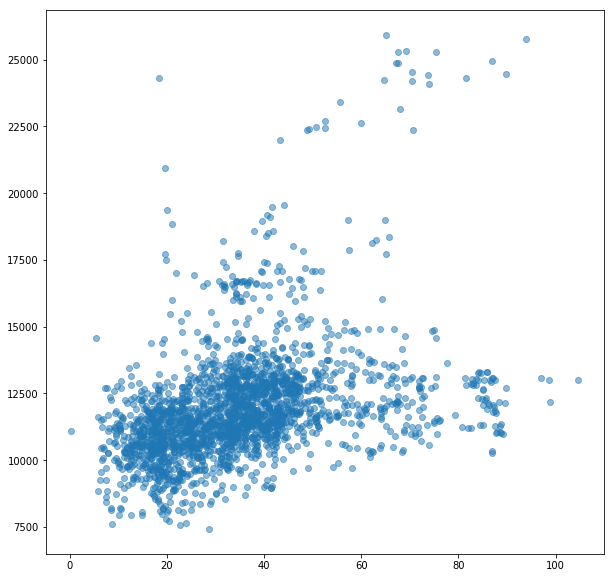

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Reddito imponibile medio per residente"],alpha=0.5)
plt.show()

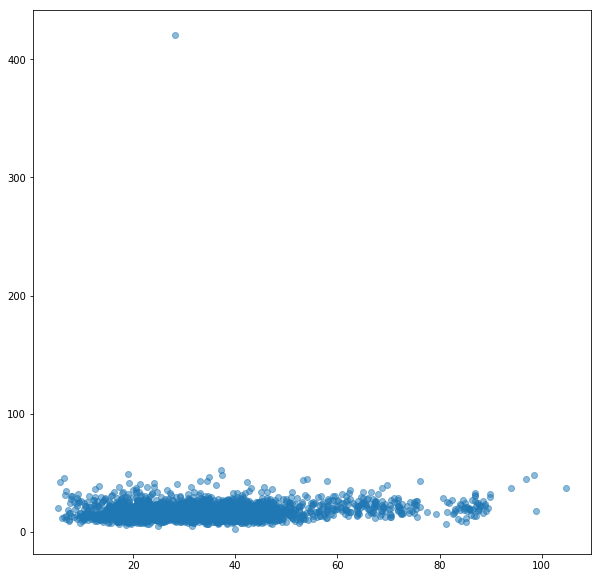

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Tasso grezzo di disoccupazione (x100)"],alpha=0.5)
plt.show()

In [21]:
df[df["Tasso grezzo di disoccupazione (x100)"]>100]

,Unnamed: 0,comune,year,Produzione pro-capite Rifiuti Urbani,Reddito imponibile medio per contribuente,Numero medio componenti per famiglie,% di Raccolta Differenziata,Reddito imponibile medio per residente,Rapporto tra avviamenti/cessazioni (x 100),Rapporto tra avviamenti/cessazioni di stranieri (x 100),Tasso grezzo di disoccupazione (x100),Tasso grezzo di disoccupazione stranieri (x100),Quoziente di incremento totale (x 1.000),Percentuale nati di cittadinanza non italiana,Tasso di pensioni sociali e assegni sociali (x 100),Percentuale studenti con esito negativo - secondaria II grado,Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione,Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione,Percentuale di avviamenti a termine,Percentuale studenti con esito negativo - secondaria I grado
567,567,Montecatini Val di Cecina,2014,743.347851,19761.869522,2.10119,28.141685,11222.238122,81.795116,101.211143,420.76555,1311.570248,-14.140271,6.666667,2.238806,NaN,NaN,NaN,70.7057,NaN


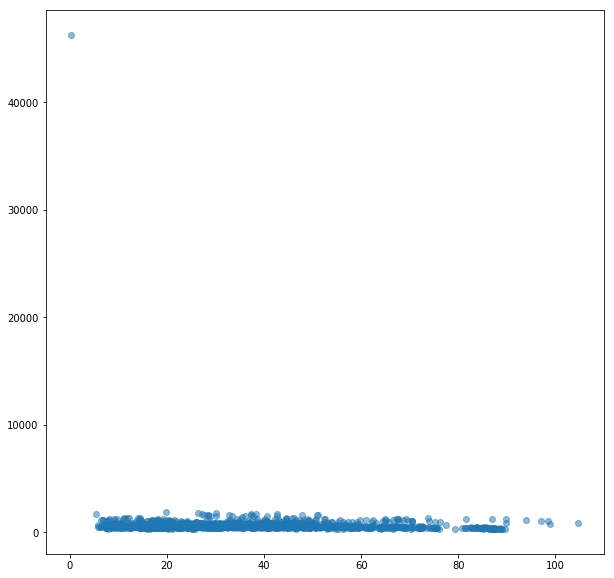

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Produzione pro-capite Rifiuti Urbani"],alpha=0.5)
plt.show()

In [11]:
df[df["Produzione pro-capite Rifiuti Urbani"]>10000]

,Unnamed: 0,comune,year,Produzione pro-capite Rifiuti Urbani,Reddito imponibile medio per contribuente,Numero medio componenti per famiglie,% di Raccolta Differenziata,Reddito imponibile medio per residente,Rapporto tra avviamenti/cessazioni (x 100),Rapporto tra avviamenti/cessazioni di stranieri (x 100),Tasso grezzo di disoccupazione (x100),Tasso grezzo di disoccupazione stranieri (x100),Quoziente di incremento totale (x 1.000),Percentuale nati di cittadinanza non italiana,Tasso di pensioni sociali e assegni sociali (x 100),Percentuale studenti con esito negativo - secondaria II grado,Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione,Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione,Percentuale di avviamenti a termine,Percentuale studenti con esito negativo - secondaria I grado
1368,1368,Pratovecchio,2007,46257.448429,19301.06674,2.24818,0.294661,11105.310695,NaN,NaN,NaN,NaN,12.059664,42.857143,2.470741,NaN,NaN,NaN,NaN,NaN


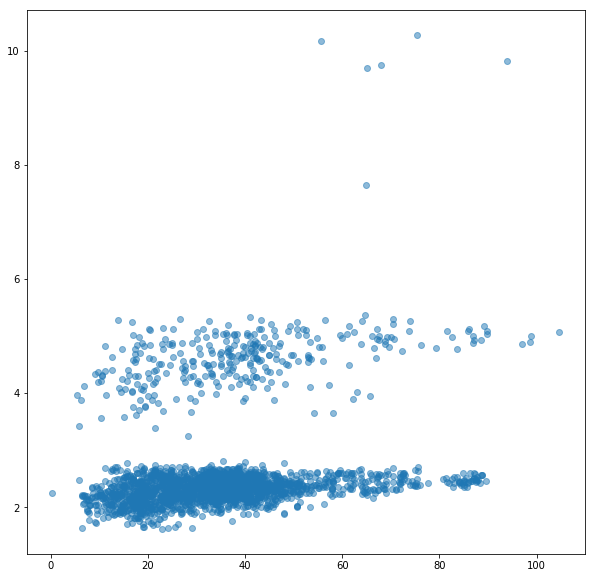

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Numero medio componenti per famiglie"],alpha=0.5)
plt.show()

In [13]:
df[df["Numero medio componenti per famiglie"]>4]

,Unnamed: 0,comune,year,Produzione pro-capite Rifiuti Urbani,Reddito imponibile medio per contribuente,Numero medio componenti per famiglie,% di Raccolta Differenziata,Reddito imponibile medio per residente,Rapporto tra avviamenti/cessazioni (x 100),Rapporto tra avviamenti/cessazioni di stranieri (x 100),Tasso grezzo di disoccupazione (x100),Tasso grezzo di disoccupazione stranieri (x100),Quoziente di incremento totale (x 1.000),Percentuale nati di cittadinanza non italiana,Tasso di pensioni sociali e assegni sociali (x 100),Percentuale studenti con esito negativo - secondaria II grado,Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione,Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione,Percentuale di avviamenti a termine,Percentuale studenti con esito negativo - secondaria I grado
4,4,Loro Ciuffenna,2011,638.207178,21743.120322,5.008044,37.784447,12848.375574,113.454545,112.318841,11.938722,25.357143,2.721551,21.153846,3.307087,8.974359,NaN,NaN,81.730769,0.000000
20,20,Fosciandora,2011,403.402889,17624.205438,4.599265,17.614993,9363.743178,127.118644,100.000000,16.145833,12.000000,1.605136,0.000000,6.557377,5.000000,NaN,NaN,80.000000,6.250000
28,28,Chitignano,2011,527.408994,20371.351626,4.405594,12.529436,10730.947538,99.038462,117.391304,16.308244,26.388889,12.847966,50.000000,1.915709,12.121212,NaN,NaN,83.495146,0.000000
36,36,Carrara,2011,594.609479,23500.398836,4.553590,29.314279,12687.218076,109.869015,120.815987,24.610780,43.139041,-4.999536,9.426230,6.269653,14.857615,NaN,NaN,90.924974,1.321586
44,44,Massa,2011,844.556263,21956.424992,4.434277,26.937076,11768.046394,118.466513,124.600417,24.559303,50.070721,-0.218017,12.969925,8.522801,16.103380,NaN,NaN,90.369619,3.750000
52,52,Montignoso,2011,593.026599,22198.209762,4.660246,52.956241,13743.092705,114.003945,137.500000,21.361397,41.019417,3.618228,7.954545,7.682177,16.793893,NaN,NaN,101.326413,2.766798
60,60,Aulla,2011,408.403227,21096.911097,4.495227,48.836179,12118.706180,108.626466,106.486486,20.684463,33.232628,6.560865,15.000000,5.174396,10.970464,NaN,NaN,76.869699,4.932735
92,92,Filattiera,2011,483.826271,20105.947806,4.250223,43.552017,11262.738559,99.043062,88.888889,14.089595,24.025974,-4.661017,33.333333,5.753425,6.741573,NaN,NaN,71.014493,3.389831
108,108,Fosdinovo,2011,409.495680,22435.034247,4.272960,42.204351,11846.347197,105.794393,92.000000,16.285901,24.000000,-4.420334,2.040816,4.170008,16.000000,NaN,NaN,87.102473,1.041667
116,116,Licciana Nardi,2011,448.462940,20091.500723,4.360229,45.059178,11262.307412,115.648855,138.095238,20.306025,33.064516,0.202511,9.523810,4.983660,5.555556,NaN,NaN,72.772277,7.438017


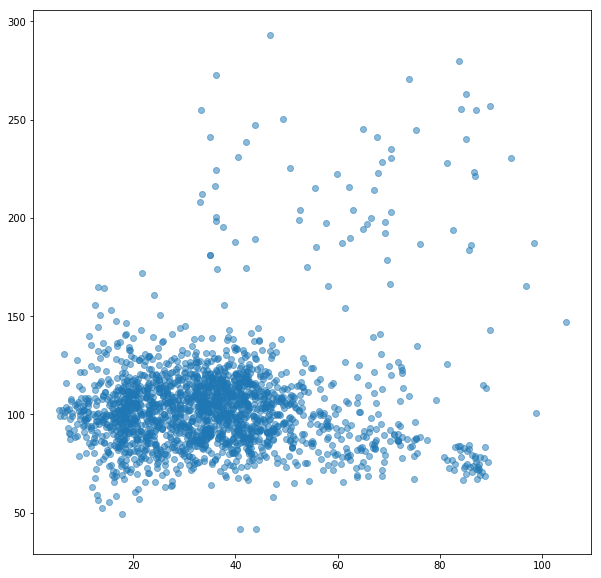

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Rapporto tra avviamenti/cessazioni (x 100)"],alpha=0.5)
plt.show()

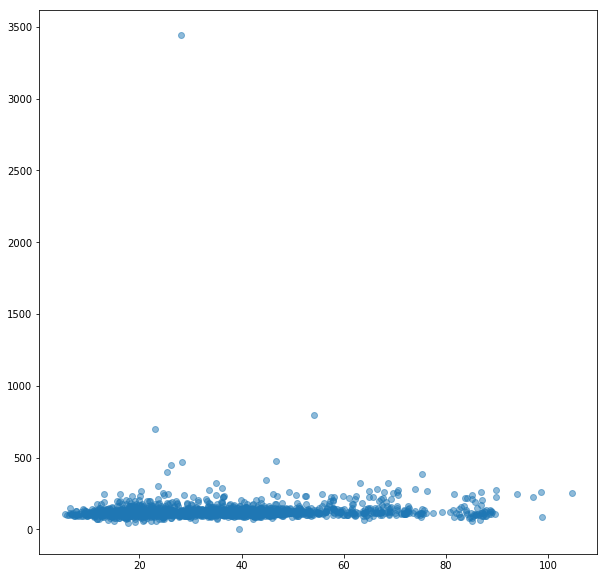

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Rapporto tra avviamenti/cessazioni di stranieri (x 100)"],alpha=0.5)
plt.show()

In [16]:
df[df["Rapporto tra avviamenti/cessazioni di stranieri (x 100)"]>2000]

,Unnamed: 0,comune,year,Produzione pro-capite Rifiuti Urbani,Reddito imponibile medio per contribuente,Numero medio componenti per famiglie,% di Raccolta Differenziata,Reddito imponibile medio per residente,Rapporto tra avviamenti/cessazioni (x 100),Rapporto tra avviamenti/cessazioni di stranieri (x 100),Tasso grezzo di disoccupazione (x100),Tasso grezzo di disoccupazione stranieri (x100),Quoziente di incremento totale (x 1.000),Percentuale nati di cittadinanza non italiana,Tasso di pensioni sociali e assegni sociali (x 100),Percentuale studenti con esito negativo - secondaria II grado,Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione,Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione,Percentuale di avviamenti a termine,Percentuale studenti con esito negativo - secondaria I grado
565,565,Montecatini Val di Cecina,2012,676.108049,19423.715116,2.084005,28.032712,11050.316428,77.188329,3442.857143,22.069597,37,2.75634,18.181818,2.962963,9.615385,NaN,NaN,86.941581,7.142857


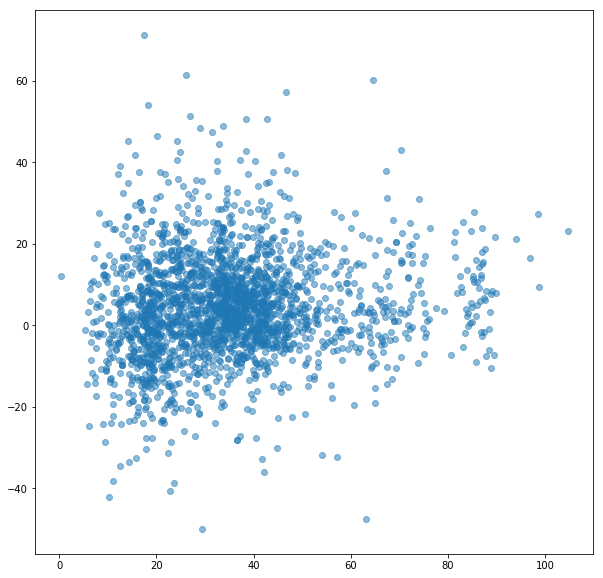

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Quoziente di incremento totale (x 1.000)"],alpha=0.5)
plt.show()

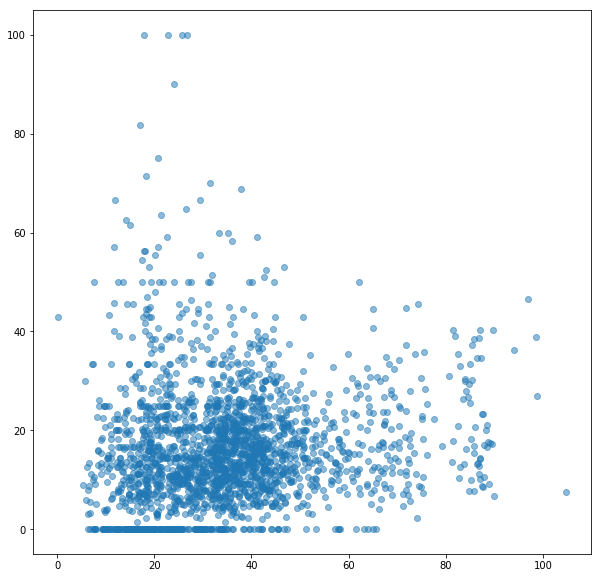

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Percentuale nati di cittadinanza non italiana"],alpha=0.5)
plt.show()

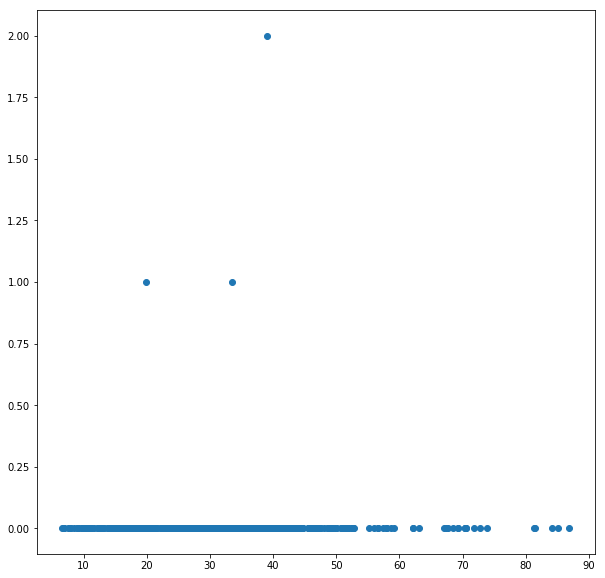

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione"])
plt.show()

In [24]:
df[df["Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione"]>0]

,Unnamed: 0,comune,year,Produzione pro-capite Rifiuti Urbani,Reddito imponibile medio per contribuente,Numero medio componenti per famiglie,% di Raccolta Differenziata,Reddito imponibile medio per residente,Rapporto tra avviamenti/cessazioni (x 100),Rapporto tra avviamenti/cessazioni di stranieri (x 100),Tasso grezzo di disoccupazione (x100),Tasso grezzo di disoccupazione stranieri (x100),Quoziente di incremento totale (x 1.000),Percentuale nati di cittadinanza non italiana,Tasso di pensioni sociali e assegni sociali (x 100),Percentuale studenti con esito negativo - secondaria II grado,Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione,Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione,Percentuale di avviamenti a termine,Percentuale studenti con esito negativo - secondaria I grado
1361,1361,Poppi,2008,589.013304,20887.279740,2.364188,19.920517,11707.330219,91.631799,91.228070,12.552198,17.052980,13.462148,25.000000,4.722793,12.184874,0,1,80.365297,1.212121
2075,2075,Gambassi Terme,2010,543.164300,19528.964420,2.542753,33.537979,11578.734888,211.958763,278.082192,13.875155,14.652015,3.651116,22.500000,3.021719,11.224490,0,1,102.237354,6.500000
2235,2235,Prato,2010,812.332470,22381.257024,2.486781,39.094835,12601.577067,110.425116,135.831158,16.738837,16.745283,6.451750,35.414481,5.289692,16.602877,0,2,78.195547,5.885569


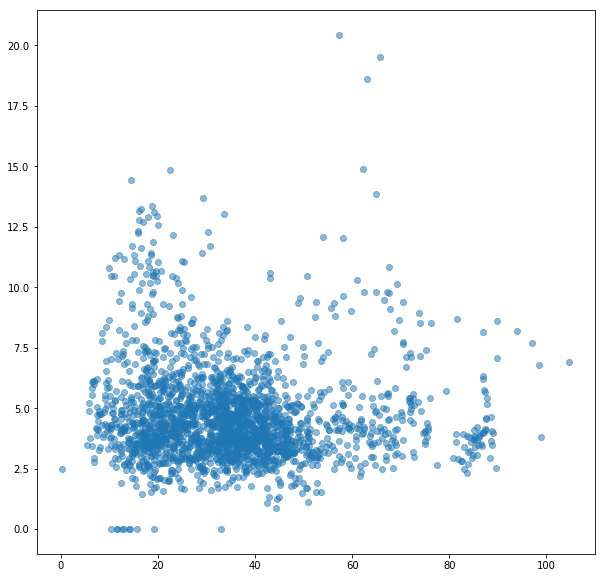

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Tasso di pensioni sociali e assegni sociali (x 100)"],alpha=0.5)
plt.show()

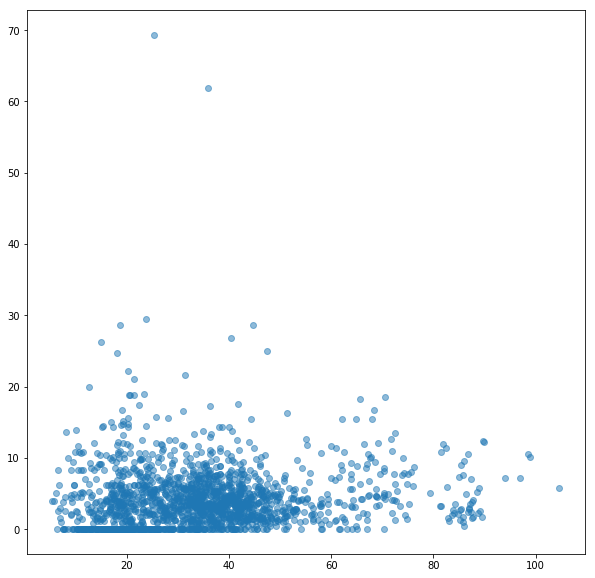

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Percentuale studenti con esito negativo - secondaria I grado"],alpha=0.5)
plt.show()

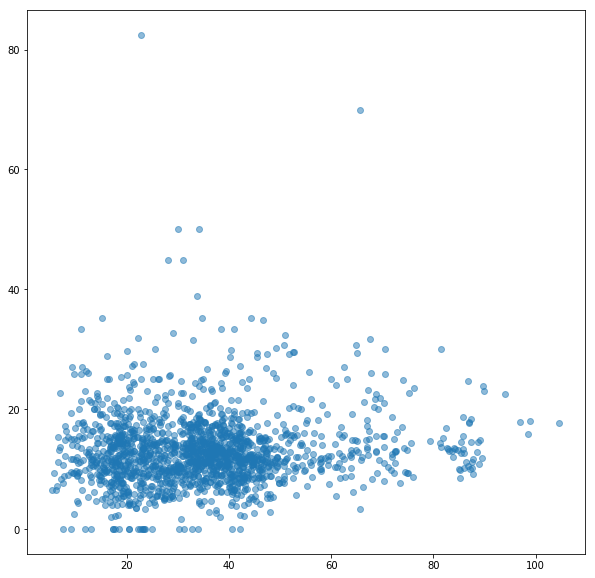

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Percentuale studenti con esito negativo - secondaria II grado"],alpha=0.5)
plt.show()

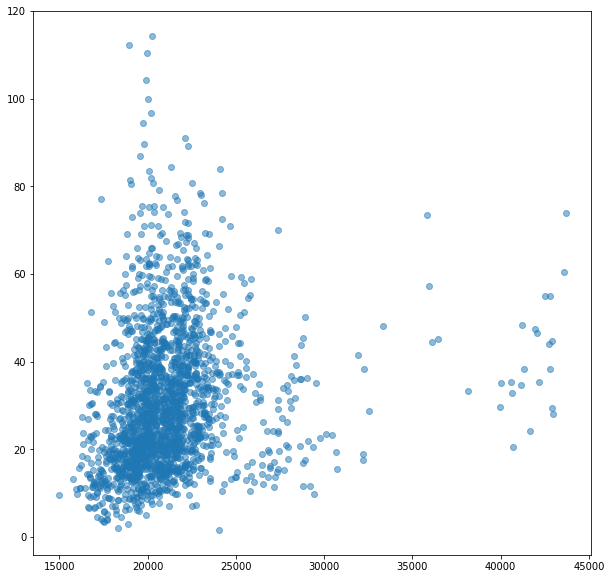

In [32]:
plt.figure(figsize=(10,10))
df_new = df[df["Tasso grezzo di disoccupazione (x100)"]<100]
plt.scatter(df_new["Reddito imponibile medio per contribuente"],df_new["Tasso grezzo di disoccupazione stranieri (x100)"],alpha=0.5)
plt.show()

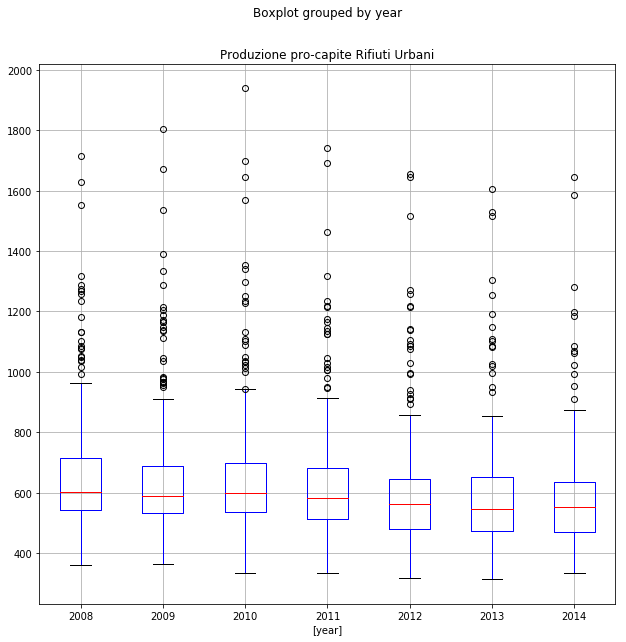

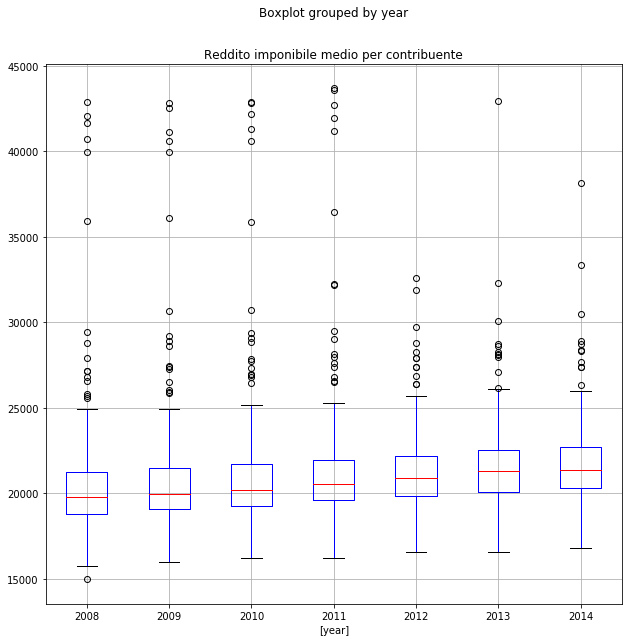

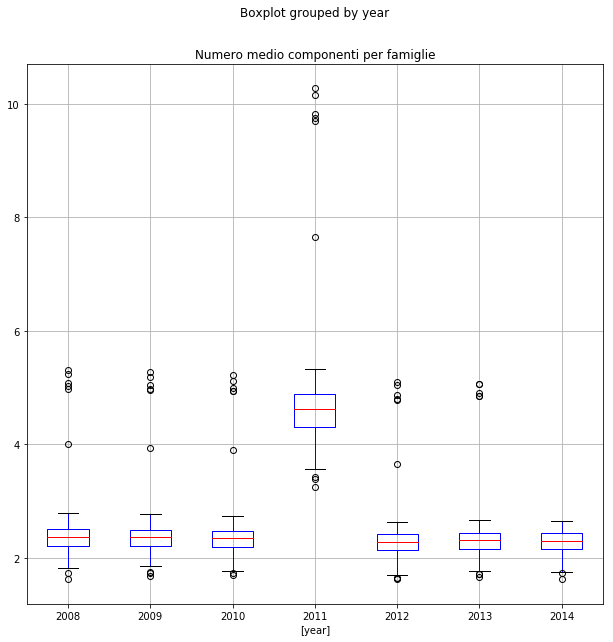

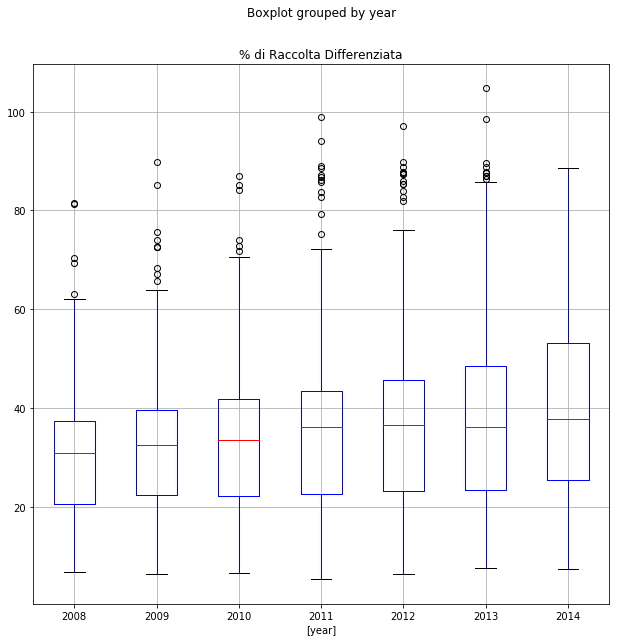

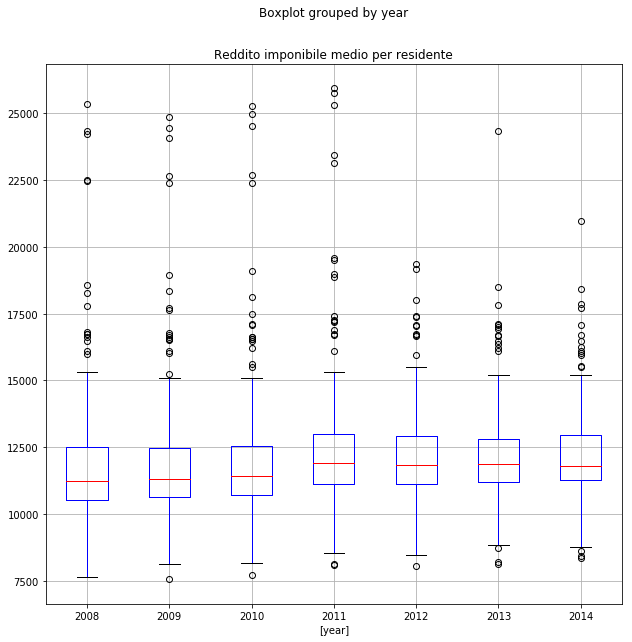

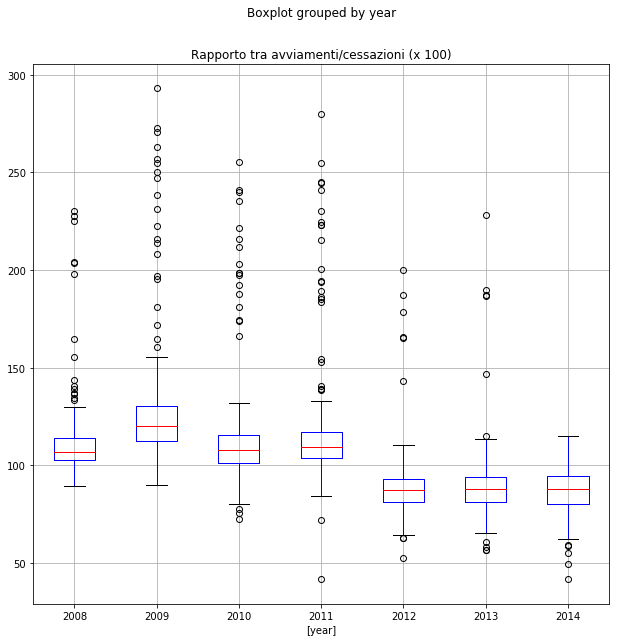

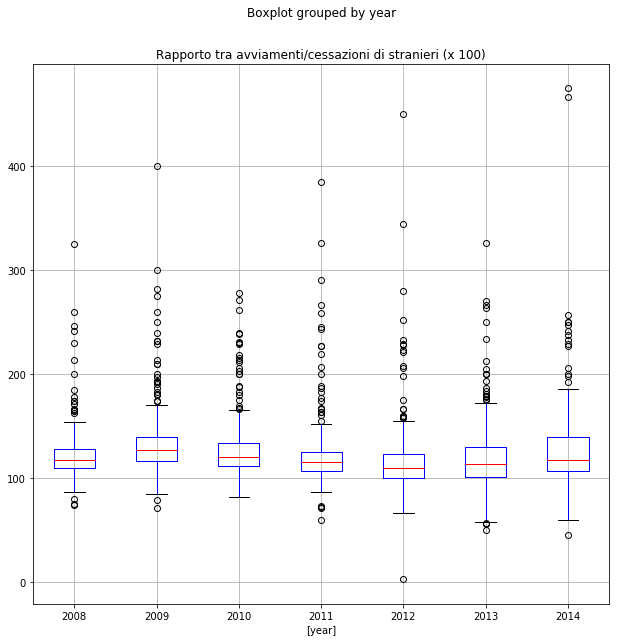

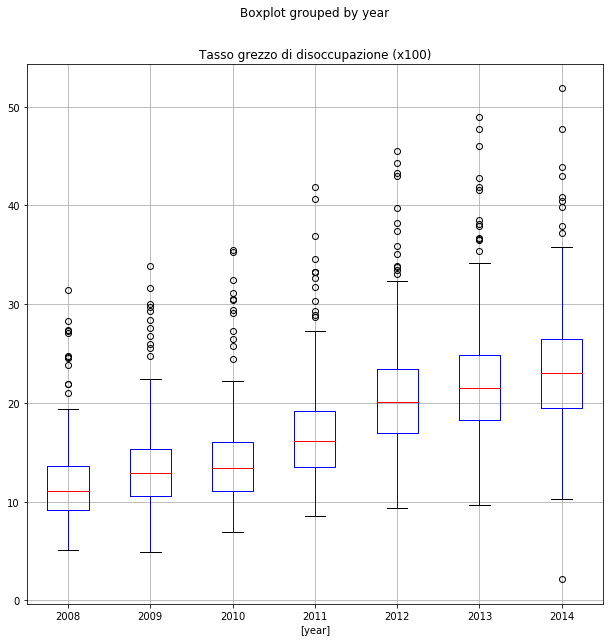

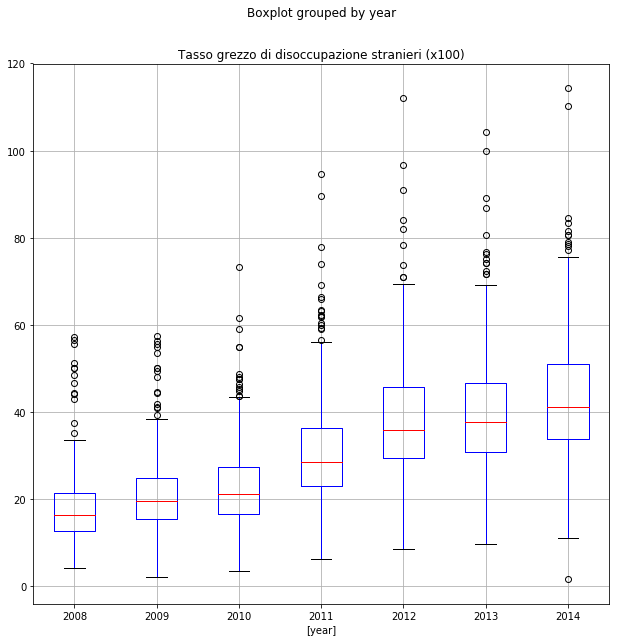

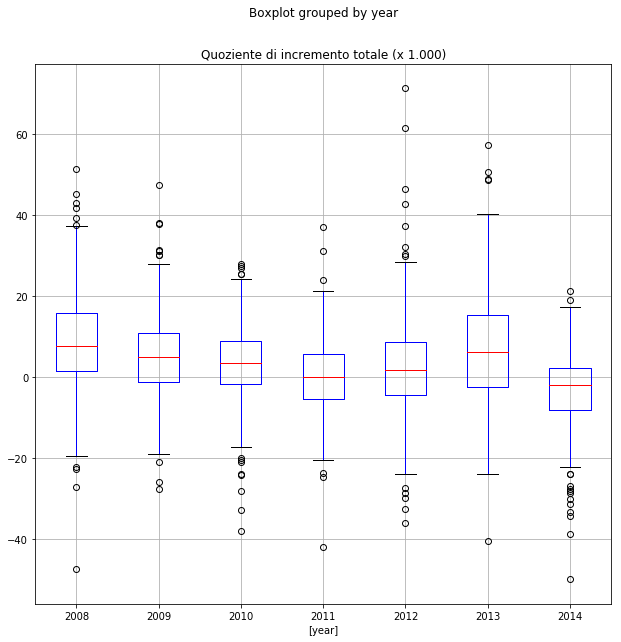

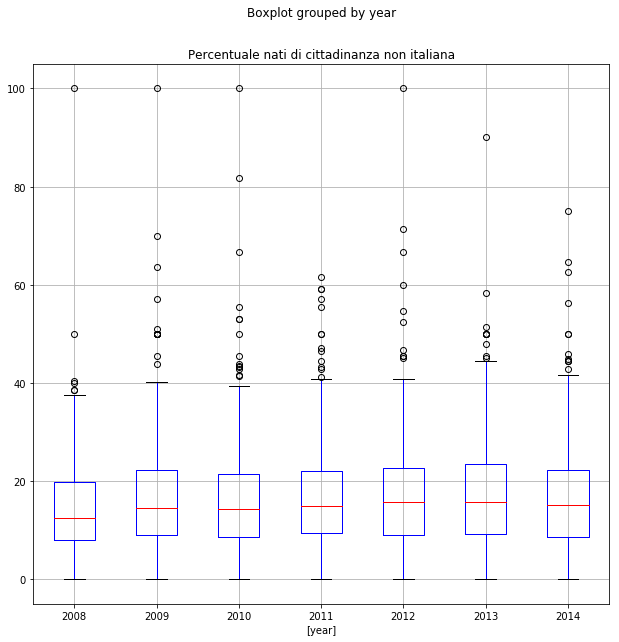

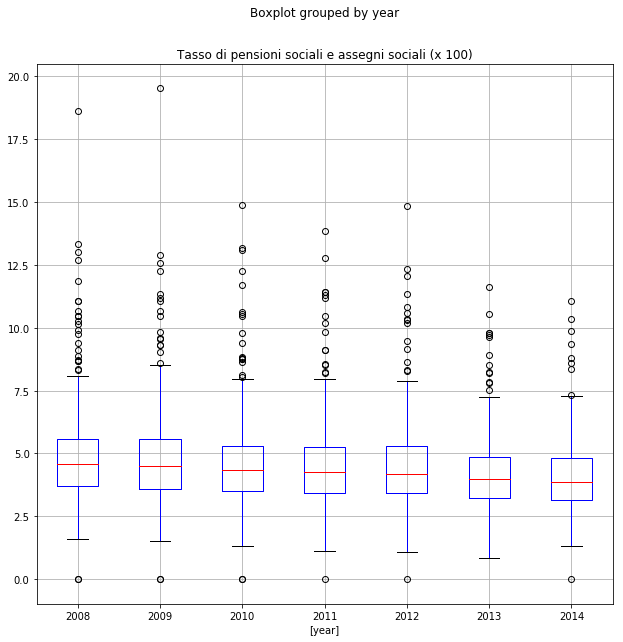

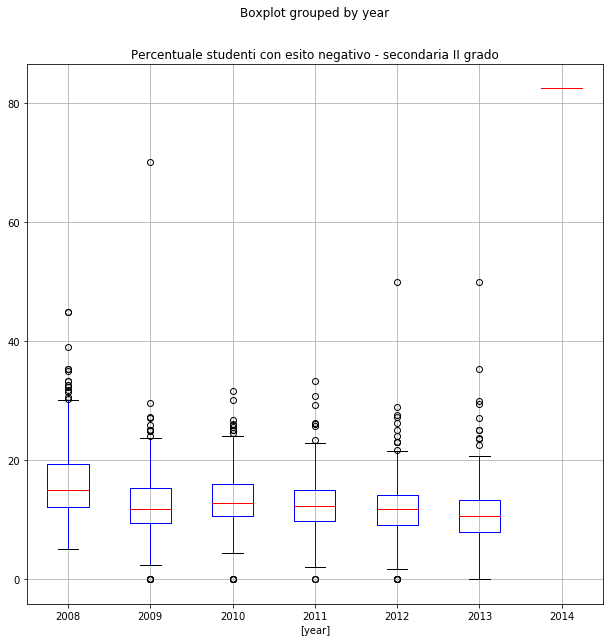

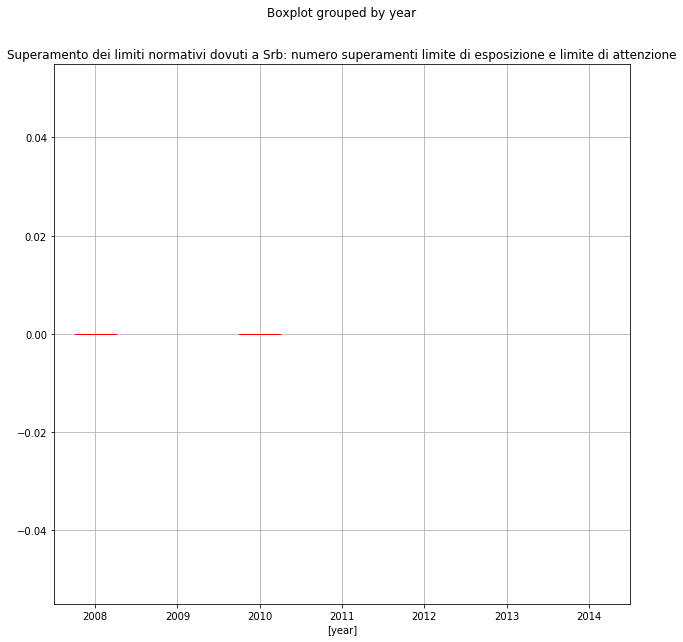

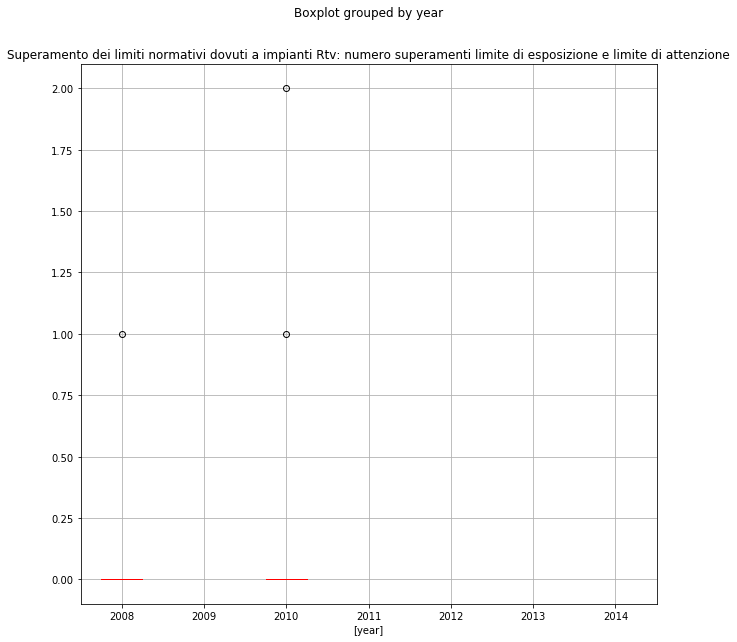

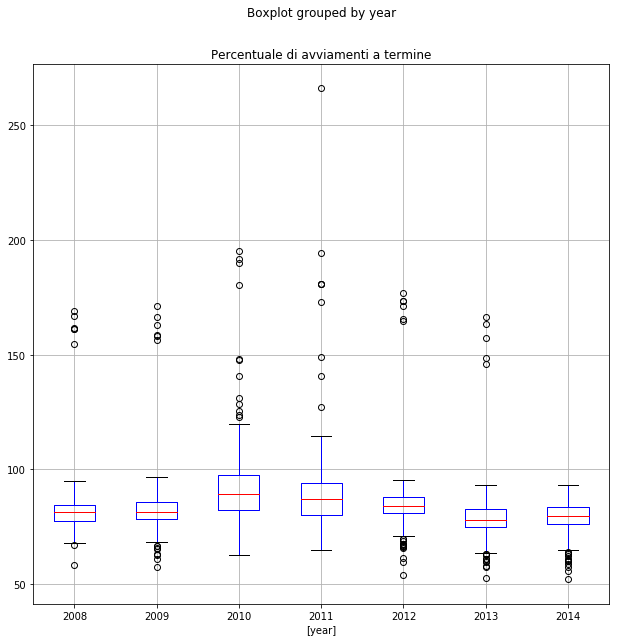

In [41]:
df_filter = df[(df['Tasso grezzo di disoccupazione (x100)']<100) & 
              (df['Rapporto tra avviamenti/cessazioni (x 100)']<500) &
              (df['Produzione pro-capite Rifiuti Urbani']<10000) &
              (df['Rapporto tra avviamenti/cessazioni di stranieri (x 100)']<500)]

for k in df_filter.keys()[3:-1]:
    df_filter.boxplot(column=[k], by=['year'],figsize=(10,10))
    
    
    